# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Read CTL : radiative budget, tas

## First model : CNRM-CM6-1

In [2]:
#------------- CNRM_amip : open files and read variables ----------------------
#
path_amip = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename_amipCTL = "*_amip_*.nc"
file_amipCTL = xr.open_mfdataset(path_amip+filename_amipCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_amipCTL=file_amipCTL[variables].to_dataframe().drop('height',axis=1)
df1_amipCTL=df_amipCTL.reset_index(level=['time'])
df1_amipCTL['year']=pd.DatetimeIndex(df1_amipCTL['time']).year
amip_CTL=df1_amipCTL.groupby(['year']).mean()
#amip_CTL

In [3]:
# Compute radiative budget 
amip_CTL['F']=amip_CTL['rsdt']
amip_CTL['H']=amip_CTL['rsut']+amip_CTL['rlut']
amip_CTL['N']=amip_CTL['F']-amip_CTL['H']

# reshape
year_list=range(2008,2014,1)
amipCTL=amip_CTL.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amipCTL

In [4]:
#------------- CNRM_SST : open files and read variables ----------------------
#
path_sst = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/SST/"
filename_sstCTL = "*_piSST_*.nc"
file_sstCTL = xr.open_mfdataset(path_sst+filename_sstCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_sstCTL=file_sstCTL[variables].to_dataframe().drop('height',axis=1)
df1_sstCTL=df_sstCTL.reset_index(level=['time'])
df1_sstCTL['year']=pd.DatetimeIndex(df1_sstCTL['time']).year
sst_CTL=df1_sstCTL.groupby(['year']).mean()
#sst_CTL

In [5]:
# Compute radiative budget 
sst_CTL['F']=sst_CTL['rsdt']
sst_CTL['H']=sst_CTL['rsut']+sst_CTL['rlut']
sst_CTL['N']=sst_CTL['F']-sst_CTL['H']

# reshape
sstCTL=sst_CTL.reset_index(level=['year']).drop(axis=1,columns='year')
#sstCTL

### Create plot

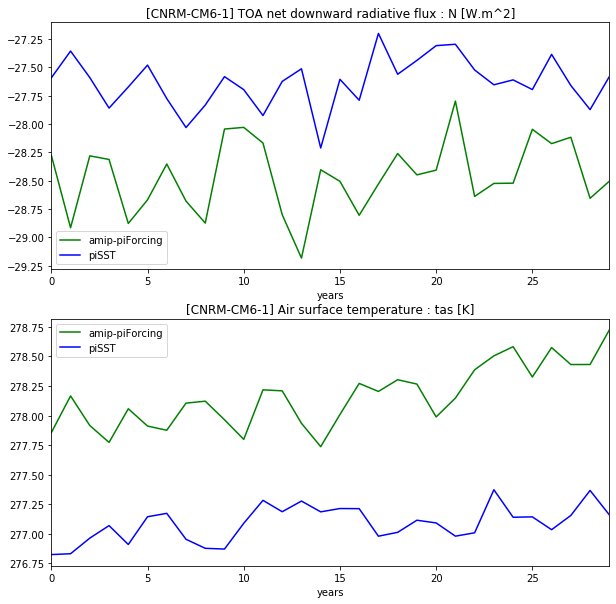

In [6]:
# Create plot of radiative budget
plt.subplot(211)
ax=plt.gca()
amipCTL.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='blue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amipCTL.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='blue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-piForcing','piSST'])

## Second model : MRI-ESM2-0

In [7]:
#------------- MRI_amip : open files and read variables ----------------------
#
path_mri = "/data/scratch/globc/peatier/CMIP6/MRI-ESM2-0/amip/"
filename_mriCTL = "*_amip_*.nc"
file_mriCTL = xr.open_mfdataset(path_mri+filename_mriCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_mriCTL=file_mriCTL[variables].to_dataframe().drop('height',axis=1)
df1_mriCTL=df_mriCTL.reset_index(level=['time'])
df1_mriCTL['year']=pd.DatetimeIndex(df1_mriCTL['time']).year
mri_CTL=df1_mriCTL.groupby(['year']).mean()
#mri_CTL

In [8]:
# Compute radiative budget 
mri_CTL['F']=mri_CTL['rsdt']
mri_CTL['H']=mri_CTL['rsut']+mri_CTL['rlut']
mri_CTL['N']=mri_CTL['F']-mri_CTL['H']

# reshape
year_list=range(2008,2014,1)
mriCTL=mri_CTL.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#mriCTL

## Third model : CanESM5 

In [9]:
#------------- Can_amip : open files and read variables ----------------------
#
path_Can = "/data/scratch/globc/peatier/CMIP6/CanESM5/amip/"
filename_CanCTL = "*standard_*_amip_*"
file_CanCTL = xr.open_mfdataset(path_Can+filename_CanCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_CanCTL=file_CanCTL[variables].to_dataframe().drop('height',axis=1)
df1_CanCTL=df_CanCTL.reset_index(level=['time'])
df1_CanCTL['time_calendar']=pd.to_datetime(df1_CanCTL['time'], format='%Y%m%d', errors='ignore')
df2_CanCTL=df1_CanCTL[['rlut', 'rsut','rsdt','tas', 'time_calendar']]
df2_CanCTL['year']=pd.DatetimeIndex(df2_CanCTL['time_calendar']).year
Can_CTL=df2_CanCTL.groupby(['year']).mean()
Can_CTL

,rlut,rsut,rsdt,tas
year,,,,
1950,224.541794,101.284279,299.361694,278.346558
1951,224.534470,101.411736,299.279297,278.411316
1952,224.553192,101.233063,299.277588,278.374146
1953,224.342529,101.292068,299.253387,278.413483
1954,224.011673,101.199547,299.252960,278.328644
...,...,...,...,...
2010,223.817551,101.508072,299.242096,279.020416
2011,223.648010,100.630852,299.290527,279.004395
2012,224.112839,100.537941,299.329865,279.227570


In [17]:
# Compute radiative budget 
Can_CTL['F']=Can_CTL['rsdt']
Can_CTL['H']=Can_CTL['rsut']+Can_CTL['rlut']
Can_CTL['N']=Can_CTL['F']-Can_CTL['H']

# reshape
yr=range(1950,1979,1)
year_list=range(2008,2014,1)
CanCTL=Can_CTL.drop(yr).drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
CanCTL

,rlut,rsut,rsdt,tas,F,H,N
0,224.094269,101.275246,299.433319,278.612152,299.433319,325.369507,-25.936188
1,224.303146,101.625610,299.438232,278.650116,299.438232,325.928772,-26.490540
2,223.638321,101.534378,299.444275,278.506012,299.444275,325.172699,-25.728424
3,223.598221,101.851273,299.373169,278.392548,299.373169,325.449493,-26.076324
4,224.522186,102.622719,299.370239,278.848450,299.370239,327.144897,-27.774658
5,223.957214,101.585754,299.287170,278.691956,299.287170,325.542969,-26.255798
6,223.716125,101.750282,299.253052,278.635223,299.253052,325.466400,-26.213348
7,223.591339,101.255348,299.256927,278.596161,299.256927,324.846680,-25.589752
8,223.833237,101.442604,299.270264,278.601318,299.270264,325.275848,-26.005585
9,223.903534,101.238564,299.345673,278.681244,299.345673,325.142090,-25.796417


# Read amip-p4xCO2 : radiative budget, tas

## First model : CNRM-CM6-1

In [18]:
#------------- CNRM_amip : open files and read variables ----------------------
#
filename_amip4xCO2 = "*_amip-4xCO2_*.nc"
file_amip4xCO2 = xr.open_mfdataset(path_amip+filename_amip4xCO2,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_amip4xCO2=file_amip4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_amip4xCO2=df_amip4xCO2.reset_index(level=['time'])
df1_amip4xCO2['year']=pd.DatetimeIndex(df1_amip4xCO2['time']).year
amip_4xCO2=df1_amip4xCO2.groupby(['year']).mean()
#amip_4xCO2

In [19]:
# Compute radiative budget 
amip_4xCO2['F']=amip_4xCO2['rsdt']
amip_4xCO2['H']=amip_4xCO2['rsut']+amip_4xCO2['rlut']
amip_4xCO2['N']=amip_4xCO2['F']-amip_4xCO2['H']

# reshape
year_list=range(2009,2015,1)
amip4xCO2=amip_4xCO2.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amip4xCO2

## Second model : MRI-ESM2-0

In [20]:
filename_mri4xCO2 = "*_amip-4xCO2_*.nc"
file_mri4xCO2 = xr.open_mfdataset(path_mri+filename_mri4xCO2,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_mri4xCO2=file_mri4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_mri4xCO2=df_mri4xCO2.reset_index(level=['time'])
df1_mri4xCO2['year']=pd.DatetimeIndex(df1_mri4xCO2['time']).year
mri_4xCO2=df1_mri4xCO2.groupby(['year']).mean()
#mri_4xCO2

In [21]:
# Compute radiative budget 
mri_4xCO2['F']=mri_4xCO2['rsdt']
mri_4xCO2['H']=mri_4xCO2['rsut']+mri_4xCO2['rlut']
mri_4xCO2['N']=mri_4xCO2['F']-mri_4xCO2['H']

# reshape
year_list=range(2009,2015,1)
mri4xCO2=mri_4xCO2.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#mri4xCO2

## Third model : CanESM5 

In [22]:
filename_Can4xCO2 = "standard_*_amip-4xCO2_*"
file_Can4xCO2 = xr.open_mfdataset(path_Can+filename_Can4xCO2,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_Can4xCO2=file_Can4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_Can4xCO2=df_Can4xCO2.reset_index(level=['time'])
df1_Can4xCO2['time_calendar']=pd.to_datetime(df1_Can4xCO2['time'], format='%Y%m%d', errors='ignore')
df2_Can4xCO2=df1_Can4xCO2[['rlut', 'rsut','rsdt','tas', 'time_calendar']]
df2_Can4xCO2['year']=pd.DatetimeIndex(df2_Can4xCO2['time_calendar']).year
Can_4xCO2=df2_Can4xCO2.groupby(['year']).mean()
#Can_4xCO2

In [24]:
# Compute radiative budget 
Can_4xCO2['F']=Can_4xCO2['rsdt']
Can_4xCO2['H']=Can_4xCO2['rsut']+Can_4xCO2['rlut']
Can_4xCO2['N']=Can_4xCO2['F']-Can_4xCO2['H']

# reshape
yr=range(1950,1979,1)
year_list=range(2009,2015,1)
Can4xCO2=Can_4xCO2.drop(yr).drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
Can4xCO2

,rlut,rsut,rsdt,tas,F,H,N
0,219.064850,99.428894,299.433319,279.398529,299.433319,318.493744,-19.060425
1,218.869492,99.591125,299.438232,279.333557,299.438232,318.460632,-19.022400
2,218.755783,99.743134,299.444275,279.334930,299.444275,318.498901,-19.054626
3,218.464233,99.973579,299.373169,279.108490,299.373169,318.437805,-19.064636
4,218.898590,100.886909,299.370239,279.355560,299.370239,319.785492,-20.415253
5,218.469604,99.994179,299.287170,279.214264,299.287170,318.463776,-19.176605
6,218.409927,99.664062,299.253052,279.227783,299.253052,318.073975,-18.820923
7,218.488342,99.628845,299.256927,279.293152,299.256927,318.117188,-18.860260
8,218.870026,99.539436,299.270264,279.371307,299.270264,318.409454,-19.139191
9,218.679199,99.371178,299.345673,279.333984,299.345673,318.050385,-18.704712


# Read piSST-p4xCO2 : radiative budget, tas

In [25]:
#------------- CNRM_SST : open files and read variables ----------------------
#
filename_sst4xCO2 = "*_piSST-4xCO2_*.nc"
file_sst4xCO2 = xr.open_mfdataset(path_sst+filename_sst4xCO2,combine='by_coords')
#
df_sst4xCO2=file_sst4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_sst4xCO2=df_sst4xCO2.reset_index(level=['time'])
df1_sst4xCO2['year']=pd.DatetimeIndex(df1_sst4xCO2['time']).year
sst_4xCO2=df1_sst4xCO2.groupby(['year']).mean()
#sst_4xCO2

In [26]:
# Compute radiative budget 
sst_4xCO2['F']=sst_4xCO2['rsdt']
sst_4xCO2['H']=sst_4xCO2['rsut']+sst_4xCO2['rlut']
sst_4xCO2['N']=sst_4xCO2['F']-sst_4xCO2['H']
sst4xCO2=sst_4xCO2.reset_index(level=['year'])#.drop(axis=1,columns='year')
#sst4xCO2

### Create plot

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


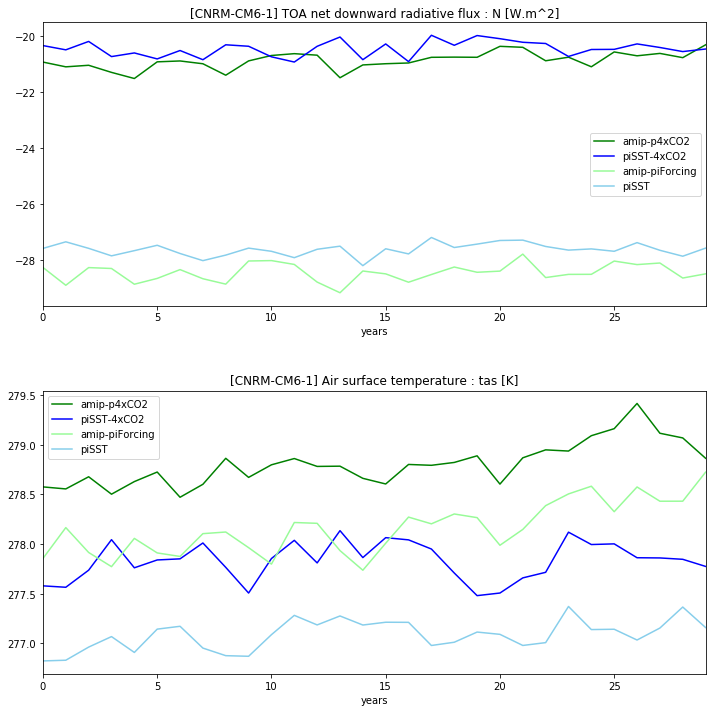

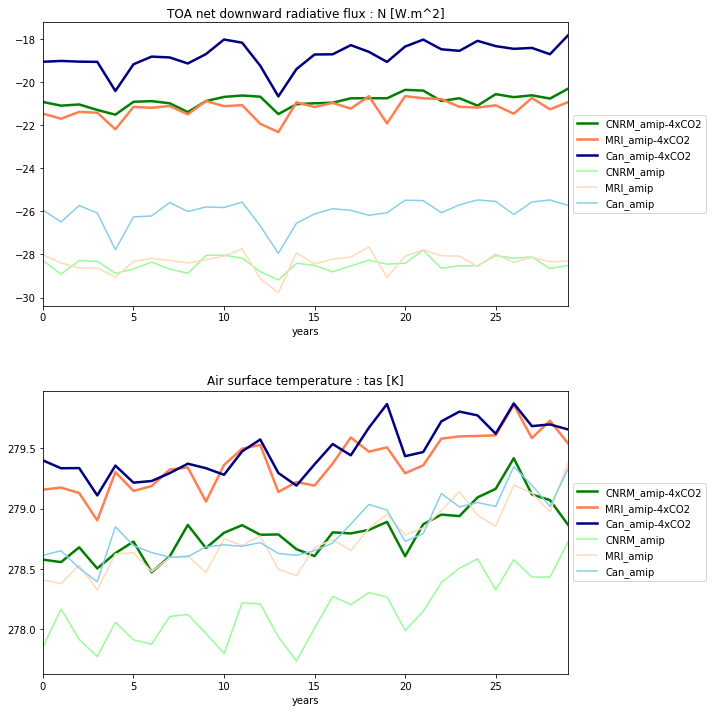

In [34]:
# Comparison amip and sst.............................................................
plt.subplots(figsize=(6,10))

plt.subplot(211)
ax=plt.gca()
amip4xCO2.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax)
sst4xCO2.plot(y='N',kind='line',legend=True, color='blue',ax=ax)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-p4xCO2','piSST-4xCO2','amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amip4xCO2.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax1)
sst4xCO2.plot(y='tas',kind='line',legend=True, color='blue',ax=ax1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-p4xCO2','piSST-4xCO2','amip-piForcing','piSST'])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)


# Inter model comparison..............................................................
plt.subplots(figsize=(6,10))

plt.subplot(211)
ax_model=plt.gca()
amip4xCO2.plot(y='N',kind='line',title='TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),linewidth=2.5,ax=ax_model)
mri4xCO2.plot(y='N',kind='line',legend=True, color='coral',linewidth=2.5,ax=ax_model)
Can4xCO2.plot(y='N',kind='line',legend=True, color='navy',linewidth=2.5,ax=ax_model)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax_model)
mriCTL.plot(y='N',kind='line',legend=True, color='peachpuff',ax=ax_model)
CanCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax_model)
plt.xlabel('years')
ax_model.legend(['CNRM_amip-4xCO2','MRI_amip-4xCO2','Can_amip-4xCO2','CNRM_amip','MRI_amip','Can_amip'],loc='center left', bbox_to_anchor=(1, 0.5))
#
# tas
plt.subplot(212)
ax_model1=plt.gca()
amip4xCO2.plot(y='tas',kind='line',title='Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),linewidth=2.5,ax=ax_model1)
mri4xCO2.plot(y='tas',kind='line',legend=True, color='coral',linewidth=2.5,ax=ax_model1)
Can4xCO2.plot(y='tas',kind='line',legend=True, color='navy',linewidth=2.5,ax=ax_model1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax_model1)
mriCTL.plot(y='tas',kind='line',legend=True, color='peachpuff',ax=ax_model1)
CanCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax_model1)
plt.xlabel('years')
ax_model1.legend(['CNRM_amip-4xCO2','MRI_amip-4xCO2','Can_amip-4xCO2','CNRM_amip','MRI_amip','Can_amip'],loc='center left', bbox_to_anchor=(1, 0.5))

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

#   Enregistrer les figures ...............................................................

plt.savefig("/data/home/globc/peatier/figures/TOA_tas_multimodel.pdf", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)


# Read amip-p4K : radiative budget, tas

## First model : CNRM-CM6-1

In [35]:
#------------- CNRM_amip-p4K : open files and read variables ----------------------
#
filename_amip4K = "*_amip-p4K_*.nc"
file_amip4K = xr.open_mfdataset(path_amip+filename_amip4K,combine='by_coords')
#
df_amip4K=file_amip4K[variables].to_dataframe().drop('height',axis=1)
df1_amip4K=df_amip4K.reset_index(level=['time'])
df1_amip4K['year']=pd.DatetimeIndex(df1_amip4K['time']).year
amip_p4K=df1_amip4K.groupby(['year']).mean()
#amip_p4K

In [36]:
# Compute radiative budget 
amip_p4K['F']=amip_p4K['rsdt']
amip_p4K['H']=amip_p4K['rsut']+amip_p4K['rlut']
amip_p4K['N']=amip_p4K['F']-amip_p4K['H']

# reshape
year_list=range(2008,2014,1)
amip4K=amip_p4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amip4K

## Second model :  MRI-ESM2-0

In [37]:
#------------- CNRM_amip-p4K : open files and read variables ----------------------
#
filename_mrip4K = "*_amip-p4K_*.nc"
file_mrip4K = xr.open_mfdataset(path_mri+filename_mrip4K,combine='by_coords')
#
df_mrip4K=file_mrip4K[variables].to_dataframe().drop('height',axis=1)
df1_mrip4K=df_mrip4K.reset_index(level=['time'])
df1_mrip4K['year']=pd.DatetimeIndex(df1_mrip4K['time']).year
mri_p4K=df1_mrip4K.groupby(['year']).mean()
#mri_p4K

In [38]:
# Compute radiative budget 
mri_p4K['F']=mri_p4K['rsdt']
mri_p4K['H']=mri_p4K['rsut']+mri_p4K['rlut']
mri_p4K['N']=mri_p4K['F']-mri_p4K['H']

# reshape
year_list=range(2008,2014,1)
mrip4K=mri_p4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#mrip4K

## Third model : CanESM5

In [40]:
#------------- Can_amip-p4K : open files and read variables ----------------------
#
filename_Canp4K = "*standard_*_amip-p4K_*.nc"
file_Canp4K = xr.open_mfdataset(path_Can+filename_Canp4K,combine='by_coords')
#
df_Canp4K=file_Canp4K[variables].to_dataframe().drop('height',axis=1)
df1_Canp4K=df_Canp4K.reset_index(level=['time'])
df1_Canp4K['year']=pd.DatetimeIndex(df1_Canp4K['time']).year
Can_p4K=df1_Canp4K.groupby(['year']).mean()
Can_p4K

,rlut,rsut,rsdt,tas
year,,,,
1950,231.716095,99.032860,299.361694,282.790741
1951,231.885651,98.993919,299.279297,283.031830
1952,231.849731,98.766350,299.277588,283.169312
1953,232.114960,98.924377,299.253387,283.067657
1954,231.991348,98.969353,299.252960,283.058044
...,...,...,...,...
2010,231.204239,98.912537,299.242096,283.694550
2011,231.272751,98.600113,299.290527,283.683502
2012,231.430878,98.538864,299.329865,283.839264


In [41]:
# Compute radiative budget 
Can_p4K['F']=Can_p4K['rsdt']
Can_p4K['H']=Can_p4K['rsut']+Can_p4K['rlut']
Can_p4K['N']=Can_p4K['F']-Can_p4K['H']

# reshape
yr=range(1950,1979,1)
year_list=range(2008,2014,1)
Canp4K=Can_p4K.drop(yr).drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
Canp4K

,rlut,rsut,rsdt,tas,F,H,N
0,231.669998,98.943932,299.433319,283.268127,299.433319,330.613922,-31.180603
1,231.351181,99.071953,299.438232,283.374756,299.438232,330.423126,-30.984894
2,231.472137,99.318161,299.444275,283.332062,299.444275,330.790283,-31.346008
3,231.283142,99.849670,299.373169,283.355804,299.373169,331.132812,-31.759644
4,231.431198,100.271912,299.370239,283.370483,299.370239,331.703125,-32.332886
5,231.036819,99.645805,299.287170,283.306580,299.287170,330.682617,-31.395447
6,231.107407,99.334503,299.253052,283.280243,299.253052,330.441895,-31.188843
7,231.154694,99.027573,299.256927,283.336395,299.256927,330.182251,-30.925323
8,231.491653,99.361130,299.270264,283.468719,299.270264,330.852783,-31.582520
9,231.494568,99.238228,299.345673,283.509308,299.345673,330.732788,-31.387115


# Read amip-future4K : radiative budget, tas

## First model : CNRM-CM6-1

In [42]:
#------------- CNRM_amip-future4K : open files and read variables ----------------------
#
filename_amipfuture4K = "*_amip-future4K_*.nc"
file_amipfuture4K = xr.open_mfdataset(path_amip+filename_amipfuture4K,combine='by_coords')
#
df_amipfuture4K=file_amipfuture4K[variables].to_dataframe().drop('height',axis=1)
df1_amipfuture4K=df_amipfuture4K.reset_index(level=['time'])
df1_amipfuture4K['year']=pd.DatetimeIndex(df1_amipfuture4K['time']).year
amip_future4K=df1_amipfuture4K.groupby(['year']).mean()
#amip_future4K

In [43]:
# Compute radiative budget 
amip_future4K['F']=amip_future4K['rsdt']
amip_future4K['H']=amip_future4K['rsut']+amip_future4K['rlut']
amip_future4K['N']=amip_future4K['F']-amip_future4K['H']

# reshape
year_list=range(2008,2014,1)
amipfuture4K=amip_future4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amipfuture4K

## Second model : MRI-ESM2-0

In [44]:
#------------- MRI_amip-future4K : open files and read variables ----------------------
#
filename_mrifuture4K = "*_amip-future4K_*.nc"
file_mrifuture4K = xr.open_mfdataset(path_mri+filename_mrifuture4K,combine='by_coords')
#
df_mrifuture4K=file_mrifuture4K[variables].to_dataframe().drop('height',axis=1)
df1_mrifuture4K=df_mrifuture4K.reset_index(level=['time'])
df1_mrifuture4K['year']=pd.DatetimeIndex(df1_mrifuture4K['time']).year
mri_future4K=df1_mrifuture4K.groupby(['year']).mean()
#mri_future4K

In [45]:
# Compute radiative budget 
mri_future4K['F']=mri_future4K['rsdt']
mri_future4K['H']=mri_future4K['rsut']+mri_future4K['rlut']
mri_future4K['N']=mri_future4K['F']-mri_future4K['H']

# reshape
year_list=range(2008,2014,1)
mrifuture4K=mri_future4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#mrifuture4K

## Third model : CanESM5

In [46]:
#------------- Can_amip-future4K : open files and read variables ----------------------
#
filename_Canfuture4K = "*standard_*_amip-future4K_*.nc"
file_Canfuture4K = xr.open_mfdataset(path_Can+filename_Canfuture4K,combine='by_coords')
#
df_Canfuture4K=file_Canfuture4K[variables].to_dataframe().drop('height',axis=1)
df1_Canfuture4K=df_Canfuture4K.reset_index(level=['time'])
df1_Canfuture4K['year']=pd.DatetimeIndex(df1_Canfuture4K['time']).year
Can_future4K=df1_Canfuture4K.groupby(['year']).mean()
Can_future4K

,rlut,rsut,rsdt,tas
year,,,,
1950,232.153839,98.898506,299.361694,282.977600
1951,232.335419,98.574478,299.279297,283.254211
1952,232.661850,98.604225,299.277588,283.365356
1953,232.136749,98.860001,299.253387,283.226776
1954,232.261124,98.969688,299.252960,283.243896
...,...,...,...,...
2010,231.445129,98.672081,299.242096,283.848328
2011,231.391724,98.191315,299.290527,283.841492
2012,231.739182,98.267342,299.329865,283.976654


In [47]:
# Compute radiative budget 
Can_future4K['F']=Can_future4K['rsdt']
Can_future4K['H']=Can_future4K['rsut']+Can_future4K['rlut']
Can_future4K['N']=Can_future4K['F']-Can_future4K['H']
Can_future4K
# reshape
yr=range(1950,1979,1)
year_list=range(2008,2014,1)
Canfuture4K=Can_future4K.drop(yr).drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#Can_future4K

## Create plot

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


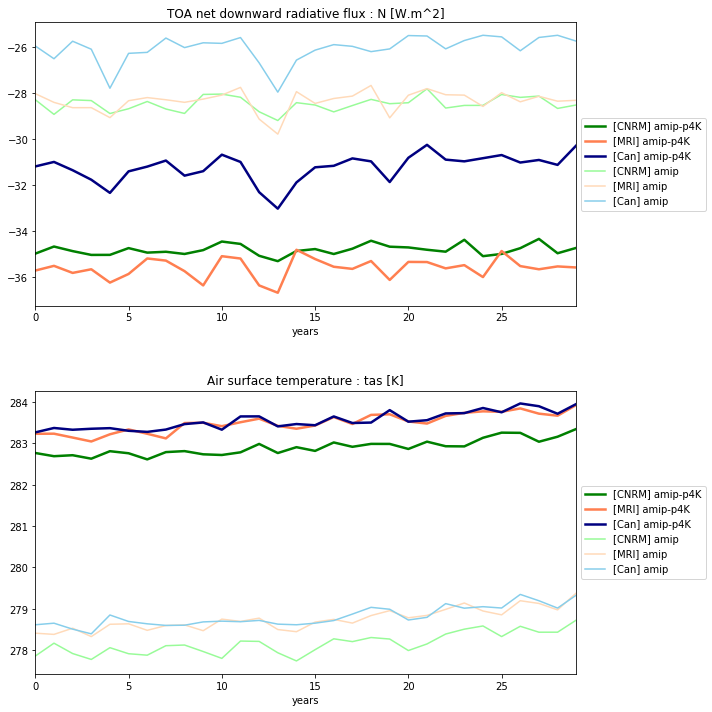

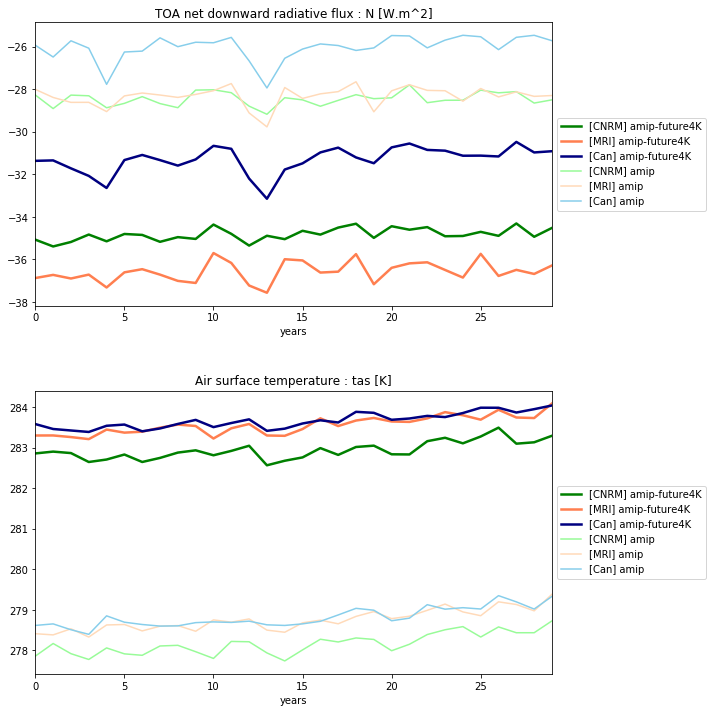

In [54]:
# Create plot of radiative budget : p4K ..........................

plt.subplots(figsize=(6,10))

plt.subplot(211)
ax=plt.gca()
amip4K.plot(y='N',kind='line',title='TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),linewidth=2.5,ax=ax)
mrip4K.plot(y='N',kind='line',legend=True, color='coral',linewidth=2.5,ax=ax)
Canp4K.plot(y='N',kind='line',legend=True, color='navy',linewidth=2.5,ax=ax)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax)
mriCTL.plot(y='N',kind='line',legend=True, color='peachpuff',ax=ax)
CanCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax)
plt.xlabel('years')
ax.legend(['[CNRM] amip-p4K','[MRI] amip-p4K','[Can] amip-p4K','[CNRM] amip', '[MRI] amip', '[Can] amip'],loc='center left', bbox_to_anchor=(1, 0.5))
#
# tas
plt.subplot(212)
ax1=plt.gca()
amip4K.plot(y='tas',kind='line',title='Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),linewidth=2.5,ax=ax1)
mrip4K.plot(y='tas',kind='line',legend=True, color='coral',linewidth=2.5,ax=ax1)
Canp4K.plot(y='tas',kind='line',legend=True, color='navy',linewidth=2.5,ax=ax1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax1)
mriCTL.plot(y='tas',kind='line',legend=True, color='peachpuff',ax=ax1)
CanCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax1)
plt.xlabel('years')
ax1.legend(['[CNRM] amip-p4K','[MRI] amip-p4K','[Can] amip-p4K','[CNRM] amip', '[MRI] amip', '[Can] amip'],loc='center left', bbox_to_anchor=(1, 0.5))


#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer es figures .........................................

plt.savefig("/data/home/globc/peatier/figures/TOA_tas_amip-p4K_multimodel.pdf", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# Create plot of radiative budget : future4K ..........................

plt.subplots(figsize=(6,10))

plt.subplot(211)
ax2=plt.gca()
amipfuture4K.plot(y='N',kind='line',legend=True,title='TOA net downward radiative flux : N [W.m^2]', color='green',figsize=(10,10),linewidth=2.5,ax=ax2)
mrifuture4K.plot(y='N',kind='line',legend=True, color='coral',linewidth=2.5,ax=ax2)
Canfuture4K.plot(y='N',kind='line',legend=True, color='navy',linewidth=2.5,ax=ax2)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax2)
mriCTL.plot(y='N',kind='line',legend=True, color='peachpuff',ax=ax2)
CanCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax2)
plt.xlabel('years')
ax2.legend(['[CNRM] amip-future4K','[MRI] amip-future4K','[Can] amip-future4K','[CNRM] amip', '[MRI] amip','[Can] amip'],loc='center left', bbox_to_anchor=(1, 0.5))
#
# tas
plt.subplot(212)
ax3=plt.gca()
amipfuture4K.plot(y='tas',kind='line',title='Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),linewidth=2.5,ax=ax3)
mrifuture4K.plot(y='tas',kind='line',legend=True, color='coral',linewidth=2.5,ax=ax3)
Canfuture4K.plot(y='tas',kind='line',legend=True, color='navy',linewidth=2.5,ax=ax3)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax3)
mriCTL.plot(y='tas',kind='line',legend=True, color='peachpuff',ax=ax3)
CanCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax3)
plt.xlabel('years')
ax3.legend(['[CNRM] amip-future4K','[MRI] amip-future4K','[Can] amip-future4K','[CNRM] amip', '[MRI] amip','[Can] amip'],loc='center left', bbox_to_anchor=(1, 0.5))

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer des figures .........................................

plt.savefig("/data/home/globc/peatier/figures/TOA_tas_amip-future4K_multimodel.pdf", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# Compute : Delta(TOA), Delta(tas), Lambda

In [56]:
result= pd.DataFrame()

i=1
N=len(amip4xCO2)

Lbda_amip=[]
Lbda_sst=[]
Lbda_amip4K=[]
Lbda_amipfuture4K=[]

Lbda_mri=[]
Lbda_mrip4K=[]
Lbda_mrifuture4K=[]

Lbda_Can=[]
Lbda_Canp4K=[]
Lbda_Canfuture4K=[]

DN_amip=[]
DN_sst=[]
DN_amip4K=[]
DN_amipfuture4K=[]

DN_mri=[]
DN_mrip4K=[]
DN_mrifuture4K=[]

DN_Can=[]
DN_Canp4K=[]
DN_Canfuture4K=[]

Dtas_amip=[]
Dtas_sst=[]
Dtas_amip4K=[]
Dtas_amipfuture4K=[]

Dtas_mri=[]
Dtas_mrip4K=[]
Dtas_mrifuture4K=[]

Dtas_Can=[]
Dtas_Canp4K=[]
Dtas_Canfuture4K=[]

while i<N:
    
    amipCTL_tmp=amipCTL.iloc[0:i,:]
    sstCTL_tmp=sstCTL.iloc[0:i,:]    
    mriCTL_tmp=mriCTL.iloc[0:i,:]
    CanCTL_tmp=CanCTL.iloc[0:i,:]
    
    amip4xCO2_tmp=amip4xCO2.iloc[0:i,:]
    Delta_N_amip=(amip4xCO2_tmp['N']-amipCTL_tmp['N']).mean()
    Delta_tas_amip=(amip4xCO2_tmp['tas']-amipCTL_tmp['tas']).mean()
    Lambda_amip=Delta_N_amip/Delta_tas_amip
    Lbda_amip.append(Lambda_amip)
    DN_amip.append(Delta_N_amip)
    Dtas_amip.append(Delta_tas_amip)
    
    sst4xCO2_tmp=sst4xCO2.iloc[0:i,:]
    Delta_N_sst=sst4xCO2_tmp['N'].mean()-sstCTL_tmp['N'].mean()
    Delta_tas_sst=sst4xCO2_tmp['tas'].mean()-sstCTL_tmp['tas'].mean()
    Lambda_sst=Delta_N_sst/Delta_tas_sst
    Lbda_sst.append(Lambda_sst)
    DN_sst.append(Delta_N_sst)
    Dtas_sst.append(Delta_tas_sst)
        
    amip4K_tmp=amip4K.iloc[0:i,:]
    Delta_N_amip4K=amip4K_tmp['N'].mean()-amipCTL_tmp['N'].mean()
    Delta_tas_amip4K=amip4K_tmp['tas'].mean()-amipCTL_tmp['tas'].mean()
    Lambda_amip4K=Delta_N_amip4K/Delta_tas_amip4K
    Lbda_amip4K.append(Lambda_amip4K)
    DN_amip4K.append(Delta_N_amip4K)
    Dtas_amip4K.append(Delta_tas_amip4K)    
    
    amipfuture4K_tmp=amipfuture4K.iloc[0:i,:]
    Delta_N_amipfuture4K=amipfuture4K_tmp['N'].mean()-amipCTL_tmp['N'].mean()
    Delta_tas_amipfuture4K=amipfuture4K_tmp['tas'].mean()-amipCTL_tmp['tas'].mean()
    Lambda_amipfuture4K=Delta_N_amipfuture4K/Delta_tas_amipfuture4K
    Lbda_amipfuture4K.append(Lambda_amipfuture4K)
    DN_amipfuture4K.append(Delta_N_amipfuture4K)
    Dtas_amipfuture4K.append(Delta_tas_amipfuture4K)   

    mri4xCO2_tmp=mri4xCO2.iloc[0:i,:]
    Delta_N_mri=(mri4xCO2_tmp['N']-mriCTL_tmp['N']).mean()
    Delta_tas_mri=(mri4xCO2_tmp['tas']-mriCTL_tmp['tas']).mean()
    Lambda_mri=Delta_N_mri/Delta_tas_mri
    Lbda_mri.append(Lambda_mri)
    DN_mri.append(Delta_N_mri)
    Dtas_mri.append(Delta_tas_mri)    

    mrip4K_tmp=mrip4K.iloc[0:i,:]
    Delta_N_mrip4K=mrip4K_tmp['N'].mean()-mriCTL_tmp['N'].mean()
    Delta_tas_mrip4K=mrip4K_tmp['tas'].mean()-mriCTL_tmp['tas'].mean()
    Lambda_mrip4K=Delta_N_mrip4K/Delta_tas_mrip4K
    Lbda_mrip4K.append(Lambda_mrip4K)
    DN_mrip4K.append(Delta_N_mrip4K)
    Dtas_mrip4K.append(Delta_tas_mrip4K)    
    
    mrifuture4K_tmp=mrifuture4K.iloc[0:i,:]
    Delta_N_mrifuture4K=mrifuture4K_tmp['N'].mean()-mriCTL_tmp['N'].mean()
    Delta_tas_mrifuture4K=mrifuture4K_tmp['tas'].mean()-mriCTL_tmp['tas'].mean()
    Lambda_mrifuture4K=Delta_N_mrifuture4K/Delta_tas_mrifuture4K
    Lbda_mrifuture4K.append(Lambda_mrifuture4K)
    DN_mrifuture4K.append(Delta_N_mrifuture4K)
    Dtas_mrifuture4K.append(Delta_tas_mrifuture4K)     
    
    Can4xCO2_tmp=Can4xCO2.iloc[0:i,:]
    Delta_N_Can=(Can4xCO2_tmp['N']-CanCTL_tmp['N']).mean()
    Delta_tas_Can=(Can4xCO2_tmp['tas']-CanCTL_tmp['tas']).mean()
    Lambda_Can=Delta_N_Can/Delta_tas_Can
    Lbda_Can.append(Lambda_Can)
    DN_Can.append(Delta_N_Can)
    Dtas_Can.append(Delta_tas_Can)    

    Canp4K_tmp=Canp4K.iloc[0:i,:]
    Delta_N_Canp4K=Canp4K_tmp['N'].mean()-CanCTL_tmp['N'].mean()
    Delta_tas_Canp4K=Canp4K_tmp['tas'].mean()-CanCTL_tmp['tas'].mean()
    Lambda_Canp4K=Delta_N_Canp4K/Delta_tas_Canp4K
    Lbda_Canp4K.append(Lambda_Canp4K)
    DN_Canp4K.append(Delta_N_Canp4K)
    Dtas_Canp4K.append(Delta_tas_Canp4K)    
    
    Canfuture4K_tmp=Canfuture4K.iloc[0:i,:]
    Delta_N_Canfuture4K=Canfuture4K_tmp['N'].mean()-CanCTL_tmp['N'].mean()
    Delta_tas_Canfuture4K=Canfuture4K_tmp['tas'].mean()-CanCTL_tmp['tas'].mean()
    Lambda_Canfuture4K=Delta_N_Canfuture4K/Delta_tas_Canfuture4K
    Lbda_Canfuture4K.append(Lambda_Canfuture4K)
    DN_Canfuture4K.append(Delta_N_Canfuture4K)
    Dtas_Canfuture4K.append(Delta_tas_Canfuture4K)       
    
    
    i=i+1
 
result['Delta_N_amip4xCO2']=DN_amip
result['Delta_tas_amip4xCO2']=Dtas_amip
result['Lambda_amip4xCO2']=Lbda_amip

result['Delta_N_amip4K']=DN_amip4K
result['Delta_tas_amip4K']=Dtas_amip4K
result['Lambda_amip4K']=Lbda_amip4K

result['Delta_N_amipfuture4K']=DN_amipfuture4K
result['Delta_tas_amipfuture4K']=Dtas_amipfuture4K
result['Lambda_amipfuture4K']=Lbda_amipfuture4K

result['Delta_N_mri4xCO2']=DN_mri
result['Delta_tas_mri4xCO2']=Dtas_mri
result['Lambda_mri4xCO2']=Lbda_mri

result['Delta_N_mrip4K']=DN_mrip4K
result['Delta_tas_mrip4K']=Dtas_mrip4K
result['Lambda_mrip4K']=Lbda_mrip4K

result['Delta_N_mrifuture4K']=DN_mrifuture4K
result['Delta_tas_mrifuture4K']=Dtas_mrifuture4K
result['Lambda_mrifuture4K']=Lbda_mrifuture4K

result['Delta_N_Can4xCO2']=DN_Can
result['Delta_tas_Can4xCO2']=Dtas_Can
result['Lambda_Can4xCO2']=Lbda_Can

result['Delta_N_Canp4K']=DN_Canp4K
result['Delta_tas_Canp4K']=Dtas_Canp4K
result['Lambda_Canp4K']=Lbda_Canp4K

result['Delta_N_Canfuture4K']=DN_Canfuture4K
result['Delta_tas_Canfuture4K']=Dtas_Canfuture4K
result['Lambda_Canfuture4K']=Lbda_Canfuture4K

result['Delta_N_sst']=DN_sst
result['Delta_tas_sst']=Dtas_sst
result['Lambda_sst']=Lbda_sst

result

,Delta_N_amip4xCO2,Delta_tas_amip4xCO2,Lambda_amip4xCO2,Delta_N_amip4K,Delta_tas_amip4K,Lambda_amip4K,Delta_N_amipfuture4K,Delta_tas_amipfuture4K,Lambda_amipfuture4K,Delta_N_mri4xCO2,...,Lambda_Can4xCO2,Delta_N_Canp4K,Delta_tas_Canp4K,Lambda_Canp4K,Delta_N_Canfuture4K,Delta_tas_Canfuture4K,Lambda_Canfuture4K,Delta_N_sst,Delta_tas_sst,Lambda_sst
0,7.350189,0.720551,10.200796,-6.701691,4.913544,-1.363922,-6.799255,4.998291,-1.360316,6.544800,...,8.743597,-5.244415,4.655975,-1.126384,-5.434570,4.965637,-1.094436,7.258270,0.756134,9.599185
1,7.583893,0.555115,13.661847,-6.228592,4.719543,-1.319745,-6.639771,4.865326,-1.364712,6.616394,...,9.758965,-4.869385,4.690308,-1.038180,-5.147125,4.885956,-1.053453,7.064407,0.745544,9.475501
2,7.469401,0.624268,11.965063,-6.348295,4.746307,-1.337523,-6.727457,4.892548,-1.375042,6.823618,...,9.143152,-5.118784,4.735535,-1.080930,-5.429779,4.895142,-1.109218,7.177723,0.755249,9.503783
3,7.356522,0.650658,11.306286,-6.441551,4.774414,-1.349182,-6.676025,4.886810,-1.366131,6.917053,...,9.297636,-5.259918,4.792480,-1.097536,-5.572746,4.919037,-1.132894,7.166069,0.810486,8.841696
4,7.357642,0.634985,11.587105,-6.384466,4.770599,-1.338294,-6.596071,4.838684,-1.363195,6.905982,...,10.048526,-5.119581,4.738403,-1.080444,-5.432404,4.872711,-1.114863,7.147955,0.818878,8.728960
5,7.423147,0.664922,11.163935,-6.331942,4.784088,-1.323542,-6.519968,4.851471,-1.343916,6.949316,...,10.501226,-5.122925,4.717773,-1.085878,-5.373325,4.872925,-1.102690,7.068192,0.798523,8.851583
6,7.429421,0.655099,11.340914,-6.367590,4.777618,-1.332796,-6.517015,4.839417,-1.346653,6.954769,...,10.753525,-5.101864,4.707397,-1.083797,-5.302910,4.857391,-1.091720,7.096235,0.781494,9.080343
7,7.462406,0.635353,11.745290,-6.348873,4.766113,-1.332086,-6.514500,4.814240,-1.353173,6.981014,...,10.609980,-5.131077,4.711487,-1.089057,-5.358395,4.859375,-1.102692,7.108017,0.816162,8.709075
8,7.464023,0.647247,11.531949,-6.323479,4.757996,-1.329022,-6.466572,4.807404,-1.345128,6.970767,...,10.396472,-5.180616,4.728821,-1.095541,-5.383980,4.872772,-1.104911,7.154505,0.824280,8.679705
9,7.433728,0.653293,11.378860,-6.369144,4.759521,-1.338190,-6.519493,4.823242,-1.351683,7.010404,...,10.441689,-5.221626,4.738739,-1.101902,-5.396332,4.885437,-1.104575,7.161434,0.805573,8.889869


In [57]:
# Lambda mean : 

L_amip=Lbda_amip[10:28]
Lamip=mean(L_amip)
#Lamip

L_sst=Lbda_sst[10:28]
Lsst=mean(L_sst)
#Lsst

L_amip4K=Lbda_amip4K[10:28]
Lamip4K=mean(L_amip4K)
#Lamip4K

L_amipfuture4K=Lbda_amipfuture4K[10:28]
Lamipfuture4K=mean(L_amipfuture4K)
Lamipfuture4K


-1.3367628

# Create plots

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


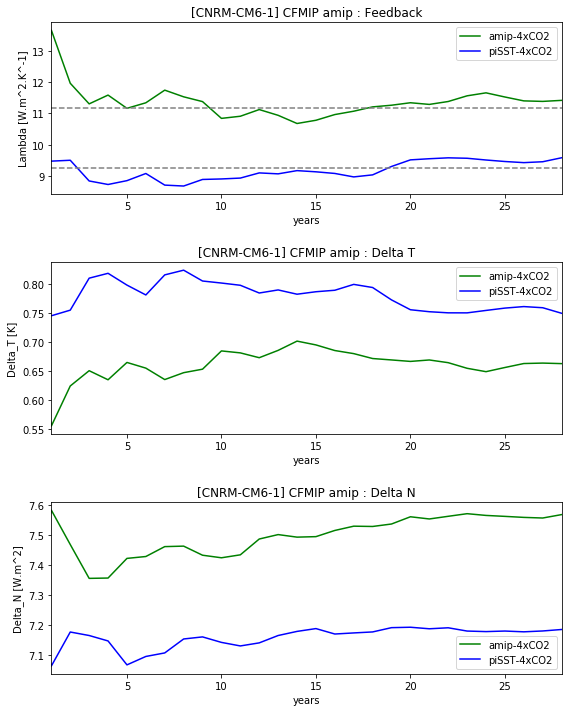

In [65]:
#--------------------------- Plot result : 4xCO2, amip and SST --------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax2=plt.gca()
result.plot(y='Lambda_amip4xCO2',kind='line',title='[CNRM-CM6-1] CFMIP amip : Feedback',legend=True, color='green',ax=ax2)
result.plot(y='Lambda_sst',kind='line',legend=True, color='blue',ax=ax2)
ax2.axhline(y=Lamip, xmin=0, xmax=36, ls='--', color='grey')
ax2.axhline(y=Lsst, xmin=0, xmax=36, ls='--', color='grey')
ax2.set_xlabel('years')
ax2.set_ylabel('Lambda [W.m^2.K^-1]')
ax2.legend(['amip-4xCO2','piSST-4xCO2'])
#ax2.set_ylim([6,10])
ax2.set_xlim([1,28])

plt.subplot(312)
ax3=plt.gca()
result.plot(y='Delta_tas_amip4xCO2',kind='line',title='[CNRM-CM6-1] CFMIP amip : Delta T',legend=True, color='green',ax=ax3)
result.plot(y='Delta_tas_sst',kind='line',legend=True, color='blue',ax=ax3)
ax3.set_xlabel('years')
ax3.set_ylabel('Delta_T [K]')
ax3.legend(['amip-4xCO2','piSST-4xCO2'])
#ax3.set_ylim([0,2])
ax3.set_xlim([1,28])

plt.subplot(313)
ax4=plt.gca()
result.plot(y='Delta_N_amip4xCO2',kind='line',color='green',title='[CNRM-CM6-1] CFMIP amip : Delta N',legend=True,ax=ax4)
result.plot(y='Delta_N_sst',kind='line',color='blue',legend=True,ax=ax4)
ax4.set_xlabel('years')
ax4.set_ylabel('Delta_N [W.m^2]')
ax4.legend(['amip-4xCO2','piSST-4xCO2'])
#ax4.set_ylim([6.5,8.5])
ax4.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)

# Enregistrement de la figure ......................................

plt.savefig("/data/home/globc/peatier/figures/Lambda_amip-piSST_CNRM.pdf", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


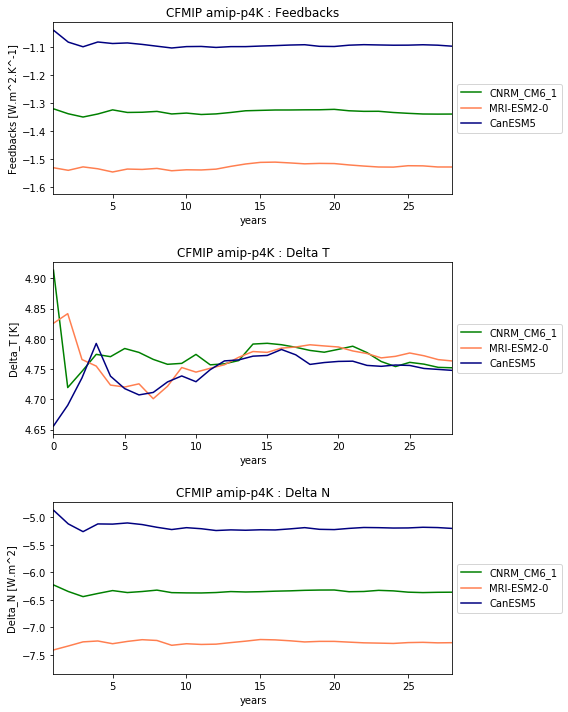

In [69]:
#--------------------------- Plot result : p4K --------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax_4K=plt.gca()
result.plot(y='Lambda_amip4K',kind='line',title='CFMIP amip-p4K : Feedbacks',legend=True, color='green',ax=ax_4K)
result.plot(y='Lambda_mrip4K',kind='line',legend=True, color='coral',ax=ax_4K)
result.plot(y='Lambda_Canp4K',kind='line',legend=True, color='navy',ax=ax_4K)
ax_4K.set_xlabel('years')
ax_4K.set_ylabel('Feedbacks [W.m^2.K^-1]')
ax_4K.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'],loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.set_ylim([6,10])
ax_4K.set_xlim([1,28])

plt.subplot(312)
ax_4K1=plt.gca()
result.plot(y='Delta_tas_amip4K',kind='line',title='CFMIP amip-p4K : Delta T',legend=True, color='green',ax=ax_4K1)
result.plot(y='Delta_tas_mrip4K',kind='line',legend=True, color='coral',ax=ax_4K1)
result.plot(y='Delta_tas_Canp4K',kind='line',legend=True, color='navy',ax=ax_4K1)
ax_4K1.set_xlabel('years')
ax_4K1.set_ylabel('Delta_T [K]')
ax_4K1.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'],loc='center left', bbox_to_anchor=(1, 0.5))
#ax_4K1.set_ylim([0,3])
ax3.set_xlim([1,28])

plt.subplot(313)
ax_4K2=plt.gca()
result.plot(y='Delta_N_amip4K',kind='line',color='green',title='CFMIP amip-p4K : Delta N',legend=True,ax=ax_4K2)
result.plot(y='Delta_N_mrip4K',kind='line',legend=True, color='coral',ax=ax_4K2)
result.plot(y='Delta_N_Canp4K',kind='line',legend=True, color='navy',ax=ax_4K2)
ax_4K2.set_xlabel('years')
ax_4K2.set_ylabel('Delta_N [W.m^2]')
ax_4K2.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'],loc='center left', bbox_to_anchor=(1, 0.5))
#ax_4K2.set_ylim([6.5,9.5])
ax_4K2.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)

# Enregistrement de la figure ......................................

plt.savefig("/data/home/globc/peatier/figures/Lambda_amip-p4K_multimodel.pdf", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


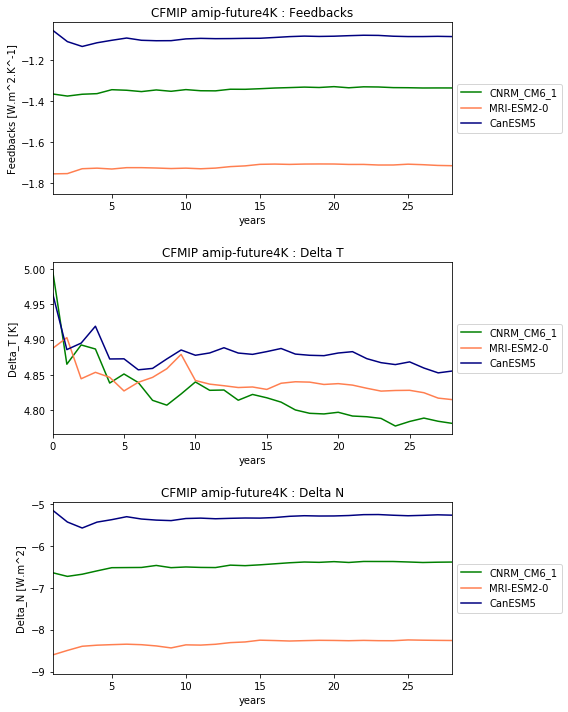

In [70]:
#--------------------------- Plot result : future4K --------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax_4K=plt.gca()
result.plot(y='Lambda_amipfuture4K',kind='line',title='CFMIP amip-future4K : Feedbacks',legend=True, color='green',ax=ax_4K)
result.plot(y='Lambda_mrifuture4K',kind='line',legend=True, color='coral',ax=ax_4K)
result.plot(y='Lambda_Canfuture4K',kind='line',legend=True, color='navy',ax=ax_4K)
ax_4K.set_xlabel('years')
ax_4K.set_ylabel('Feedbacks [W.m^2.K^-1]')
ax_4K.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'],loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.set_ylim([6,10])
ax_4K.set_xlim([1,28])

plt.subplot(312)
ax_4K1=plt.gca()
result.plot(y='Delta_tas_amipfuture4K',kind='line',title='CFMIP amip-future4K : Delta T',legend=True, color='green',ax=ax_4K1)
result.plot(y='Delta_tas_mrifuture4K',kind='line',legend=True, color='coral',ax=ax_4K1)
result.plot(y='Delta_tas_Canfuture4K',kind='line',legend=True, color='navy',ax=ax_4K1)
ax_4K1.set_xlabel('years')
ax_4K1.set_ylabel('Delta_T [K]')
ax_4K1.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'],loc='center left', bbox_to_anchor=(1, 0.5))
#ax_4K1.set_ylim([0,3])
ax3.set_xlim([1,28])

plt.subplot(313)
ax_4K2=plt.gca()
result.plot(y='Delta_N_amipfuture4K',kind='line',color='green',title='CFMIP amip-future4K : Delta N',legend=True,ax=ax_4K2)
result.plot(y='Delta_N_mrifuture4K',kind='line',legend=True, color='coral',ax=ax_4K2)
result.plot(y='Delta_N_Canfuture4K',kind='line',legend=True, color='navy',ax=ax_4K2)
ax_4K2.set_xlabel('years')
ax_4K2.set_ylabel('Delta_N [W.m^2]')
ax_4K2.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'],loc='center left', bbox_to_anchor=(1, 0.5))
#ax_4K2.set_ylim([6.5,9.5])
ax_4K2.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)

# Enregistrement de la figure ......................................

plt.savefig("/data/home/globc/peatier/figures/Lambda_amip-future4K_multimodel.pdf", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


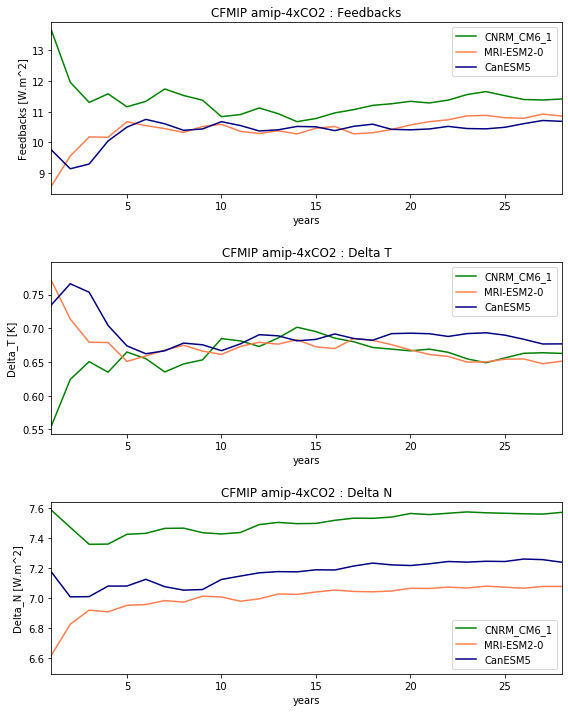

In [73]:
#--------------------------- Plot result : 4xCO2, multi-model--------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax_multimodel=plt.gca()
result.plot(y='Lambda_amip4xCO2',kind='line',title='CFMIP amip-4xCO2 : Feedbacks',legend=True, color='green',ax=ax_multimodel)
result.plot(y='Lambda_mri4xCO2',kind='line',legend=True, color='coral',ax=ax_multimodel)
result.plot(y='Lambda_Can4xCO2',kind='line',legend=True, color='navy',ax=ax_multimodel)
ax_multimodel.set_xlabel('years')
ax_multimodel.set_ylabel('Feedbacks [W.m^2]')
ax_multimodel.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'])
#ax_multimodel.set_ylim([6,10])
ax_multimodel.set_xlim([1,28])

plt.subplot(312)
ax_multimodel1=plt.gca()
result.plot(y='Delta_tas_amip4xCO2',kind='line',title='CFMIP amip-4xCO2 : Delta T',legend=True, color='green',ax=ax_multimodel1)
result.plot(y='Delta_tas_mri4xCO2',kind='line',legend=True, color='coral',ax=ax_multimodel1)
result.plot(y='Delta_tas_Can4xCO2',kind='line',legend=True, color='navy',ax=ax_multimodel1)
ax_multimodel1.set_xlabel('years')
ax_multimodel1.set_ylabel('Delta_T [K]')
ax_multimodel1.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'])
#ax_multimodel1.set_ylim([0,2])
ax_multimodel1.set_xlim([1,28])

plt.subplot(313)
ax_multimodel2=plt.gca()
result.plot(y='Delta_N_amip4xCO2',kind='line',color='green',title='CFMIP amip-4xCO2 : Delta N',legend=True,ax=ax_multimodel2)
result.plot(y='Delta_N_mri4xCO2',kind='line',color='coral',legend=True,ax=ax_multimodel2)
result.plot(y='Delta_N_Can4xCO2',kind='line',color='navy',legend=True,ax=ax_multimodel2)
ax_multimodel2.set_xlabel('years')
ax_multimodel2.set_ylabel('Delta_N [W.m^2]')
ax_multimodel2.legend(['CNRM_CM6_1','MRI-ESM2-0','CanESM5'])
#ax_multimodel2.set_ylim([6.5,8.5])
ax_multimodel2.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)

# Enregistrement de la figure ......................................

plt.savefig("/data/home/globc/peatier/figures/Lambda_amip-4xCO2_multimodel.pdf", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)